# SaudiNewsNet

In [ ]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

## EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Capstone Project/Dataset/saudinewsnet.csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head(5)

,source,url,date_extracted,title,author,content
0,aawsat,http://aawsat.com/home/article/410826/بريطانيا...,2015-07-21 02:51:32,بريطانيا: أربعة محاور لاستراتيجية جديدة تتصدى ...,لندن: رنيم حنوش,حدد رئيس الوزراء البريطاني ديفيد كاميرون، اليو...
1,aawsat,http://aawsat.com/home/article/410801/الرئيس-ه...,2015-07-21 02:51:33,الرئيس هادي يعين نايف البكري محافظا لعدن,لندن: «الشرق الأوسط أونلاين»,أصدر الرئيس عبدربه منصور هادي رئيس الجمهورية ا...
2,aawsat,http://aawsat.com/home/article/410796/مجلس-الأ...,2015-07-21 02:51:35,مجلس الأمن يصادق على «الاتفاق النووي».. وإيران...,لندن: «الشرق الأوسط أونلاين»,وافق مجلس الأمن الدولي، اليوم (الاثنين)، على ا...
3,aawsat,http://aawsat.com/home/article/410771/«نيران-ص...,2015-07-21 02:51:37,«نيران صديقة» أميركية تودي بحياة 14 جنديا أفغانيا,لندن: «الشرق الأوسط أونلاين»,قال مسؤولون أفغان ان 14 جنديا أفغانيا قتلوا في...
4,aawsat,http://aawsat.com/home/article/410751/الخارجية...,2015-07-21 02:51:38,الخارجية الإيطالية: أربعة من مواطنينا مخطوفون ...,لندن: «الشرق الأوسط أونلاين»,أعلنت وزارة الخارجية الايطالية، اليوم (الاثنين...


In [ ]:
# Preliminary Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31030 entries, 0 to 31029
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   source          31030 non-null  object
 1   url             31030 non-null  object
 2   date_extracted  31030 non-null  object
 3   title           30963 non-null  object
 4   author          26294 non-null  object
 5   content         30897 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,source,url,date_extracted,title,author,content
count,31030,31030,31030,30963,26294,30897
unique,14,31030,28265,29462,8252,30133
top,alriyadh,http://aawsat.com/home/article/410826/بريطانيا...,2015-07-25 10:02:38,كاريكاتير,«الاقتصادية» من الرياض,
freq,4852,1,3,42,608,189


### Analyzing Missing Data

In [ ]:
df.isnull().sum()

,0
source,0
url,0
date_extracted,0
title,67
author,4736
content,133


In [ ]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print("\nPercentage of missing values in each column:")
missing_percentage


Percentage of missing values in each column:


,0
source,0.000000
url,0.000000
date_extracted,0.000000
title,0.215920
author,15.262649
content,0.428617


In [ ]:
# Drop rows where any column has missing values
df = df.dropna()


In [ ]:
# Calculate the percentage of missing values after dropping rows
missing_percentage_after_cleaning = df.isnull().mean() * 100
print(missing_percentage_after_cleaning)


source            0.0
url               0.0
date_extracted    0.0
title             0.0
author            0.0
content           0.0
dtype: float64


### Understand Data Distribution

In [ ]:
# Checking the distribution of the content length
df['content_length'] = df['content'].apply(lambda x: len(str(x)))
print("\nContent Length Statistics:")
print(df['content_length'].describe())


Content Length Statistics:
count    26197.000000
mean      1786.031416
std       1702.580902
min          1.000000
25%        754.000000
50%       1263.000000
75%       2214.000000
max      33687.000000
Name: content_length, dtype: float64


In [ ]:
# Checking the distribution of the title length
df['title_length'] = df['title'].fillna("").apply(lambda x: len(str(x)))
print("\nTitle Length Statistics:")
print(df['title_length'].describe())


Title Length Statistics:
count    26197.000000
mean        47.759209
std         16.603230
min          2.000000
25%         37.000000
50%         48.000000
75%         58.000000
max        132.000000
Name: title_length, dtype: float64


### Analyze Data Source

In [ ]:
print(df.shape)
# total number of unique categories
print("Unique categories:",df['source'].nunique())
df['source'].unique()

(26197, 8)
Unique categories: 12


array(['aawsat', 'aleqtisadiya', 'aljazirah', 'almadina', 'alriyadh',
       'alwatan', 'alweeam', 'alyaum', 'arreyadi', 'okaz', 'sabq',
       'arriyadiyah'], dtype=object)

In [ ]:
# Unique sources and their counts
print("\nUnique sources and their counts:")
print(df['source'].value_counts())


Unique sources and their counts:
source
alriyadh        4404
alyaum          3065
aljazirah       2976
aleqtisadiya    2799
okaz            2703
aawsat          2602
alwatan         2109
alweeam         2046
almadina        1967
sabq            1390
arreyadi          84
arriyadiyah       52
Name: count, dtype: int64


In [ ]:
# Checking the number of unique authors
print("\nNumber of unique authors:", df['author'].nunique())


Number of unique authors: 8232


### Visualizing Data

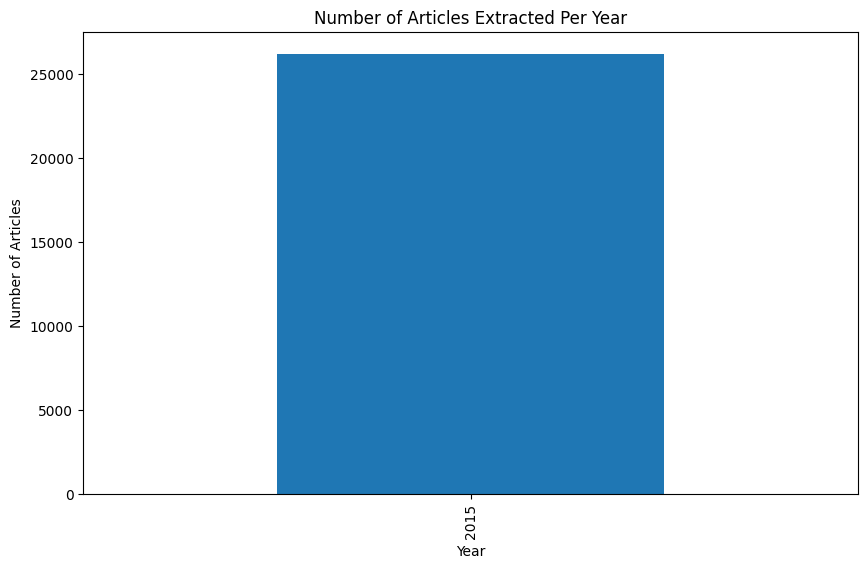

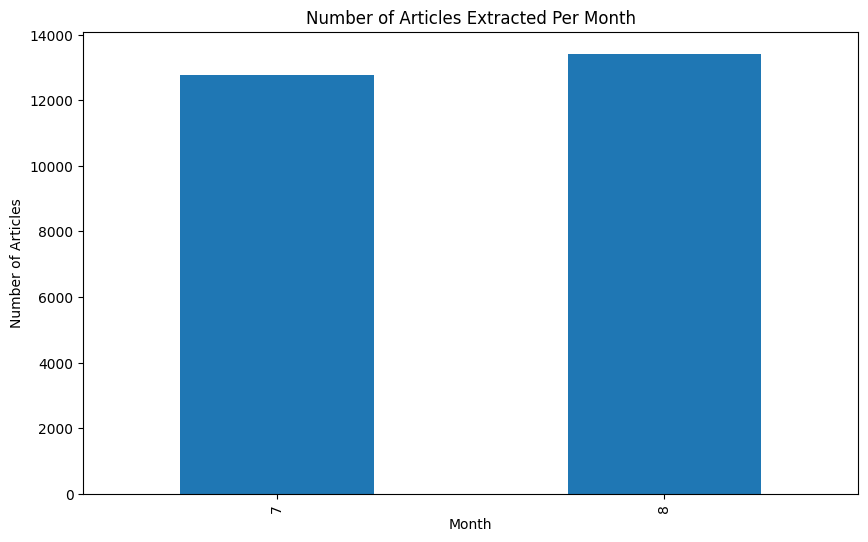

In [ ]:
import matplotlib.pyplot as plt

# Analyzing the 'date_extracted' column
# Convert 'date_extracted' to datetime format
df['date_extracted'] = pd.to_datetime(df['date_extracted'], errors='coerce')

# Extract year and month for further analysis
df['year'] = df['date_extracted'].dt.year
df['month'] = df['date_extracted'].dt.month

# Plotting the distribution of articles by year
plt.figure(figsize=(10, 6))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Articles Extracted Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()

# Plotting the distribution of articles by month
plt.figure(figsize=(10, 6))
df['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Articles Extracted Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.show()

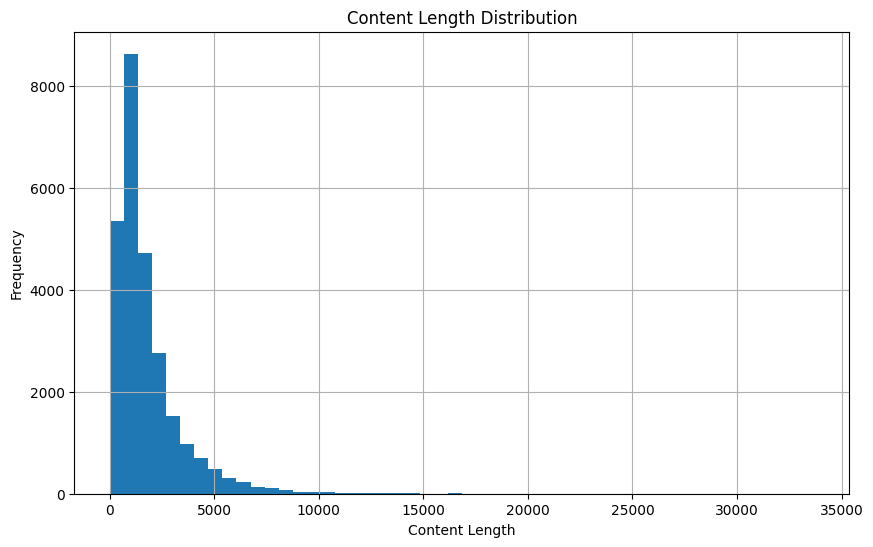

In [ ]:
# Plotting the distribution of content length
plt.figure(figsize=(10, 6))
df['content_length'].hist(bins=50)
plt.title("Content Length Distribution")
plt.xlabel("Content Length")
plt.ylabel("Frequency")
plt.show()


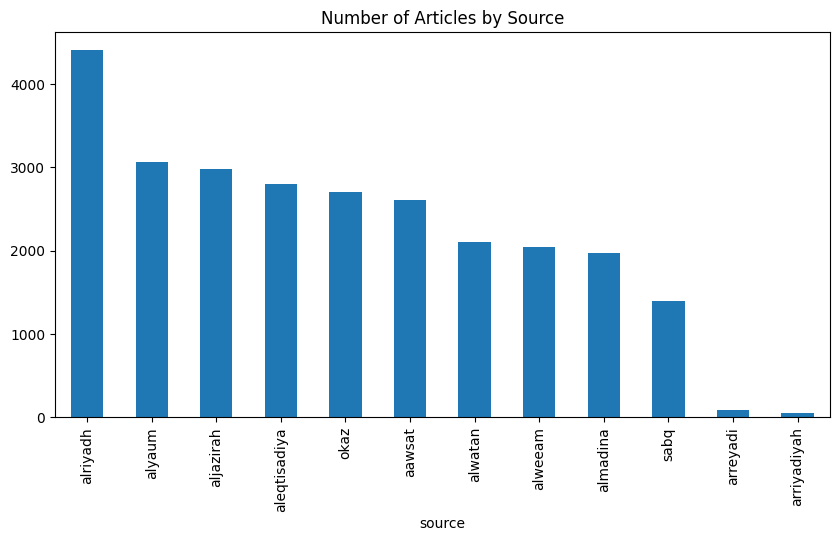

In [ ]:
df['source'].value_counts().plot(kind='bar', figsize=(10, 5), title='Number of Articles by Source')
plt.show()

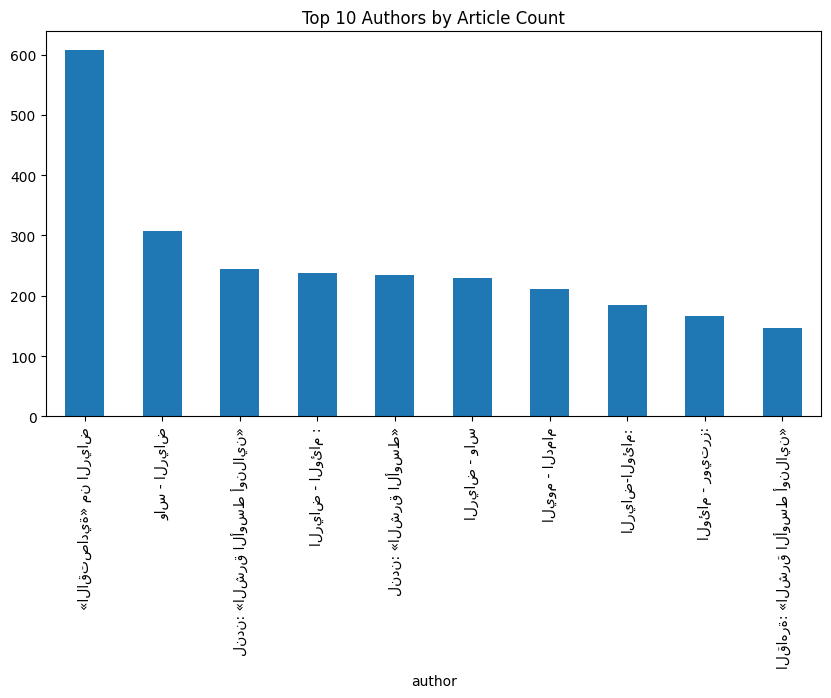

In [ ]:
df['author'].value_counts().head(10).plot(kind='bar', figsize=(10, 5), title='Top 10 Authors by Article Count')
plt.show()

### Summary Insights

1 - The dataset consists of 14 unique sources and 8,252 unique authors

2- The columns source, url, and date_extracted have no missing values, while title has around 0.22% missing values, author has about 15.26% missing values, and content has 0.43% missing values.

3- The content length ranges from 1 to 33,687 characters, with an average of approximately 1,720 characters per article.

4- The title length varies from 2 to 181 characters, with an average of about 47 characters.

5- This indicates that the dataset is relatively clean, with only minor issues with missing values in the title and content.

6- the content not labled (no  catogry)


## Data Classification

We will try two possible approaches:
1. Unsupervised Learning (without Labels):
We will try to use clustering techniques to group the articles into categories based on their content
2. Supervised Learning (with Labels):
by define categories manually, annotate the data with these categories, and then proceed with training a classifier like Arab-BERT.

# **Unsupervised Learning (without Labels)**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
categories = {
    "Politics": ["انتخابات", "حكومة", "سياسة", "وزير", "برلمان", "قانون", "رئيس", "دبلوماسية", "سلطة", "حزب", "مجلس"],
    "Finance": ["اقتصاد", "سوق", "أسهم", "استثمار", "ميزانية", "تداول", "عملات", "بنك", "مال", "أرباح", "دفع"],
    "Sports": ["مباراة", "لاعب", "فريق", "بطولة", "دوري", "هدف", "نتيجة", "ملعب", "الرياضة", "المنتخب"],
    "Religion": ["إيمان", "كنيسة", "مسجد", "صلاة", "ديني", "عقيدة", "عيد", "عبادة", "الحج", "الإسلام", "القرآن"],
    "Culture": ["فن", "موسيقى", "أدب", "سينما", "مسرح", "تقاليد", "تراث", "ثقافة", "لوحات", "معرض", "مهرجان"],
    "Medical": ["صحة", "مستشفى", "طبيب", "مرض", "دواء", "علاج", "ممرضة", "عملية", "وقاية", "عيادة", "فيروس"],
    "Tech": ["تقنية", "برمجيات", "أجهزة", "ذكاء اصطناعي", "روبوتات", "ابتكار", "اختراع", "إنترنت", "جوال", "شبكات"],
    "unknown": []  # Placeholder for content that doesn't match any category
}


In [ ]:
# Step 1: Preprocess the text (TF-IDF vectorization)
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words=["في", "من", "على", "و", "إلى", "عن", "التي", "الذي", "هذا", "ذلك", "لكن", "ما"]
)
X = tfidf.fit_transform(df["content"].fillna(""))


In [ ]:
# Step 2: Perform KMeans clustering
num_clusters = len(categories)  # Number of clusters equal to the number of categories
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)


KMeans(random_state=42)

In [ ]:
# Step 3: Assign clusters back to the dataset
df['cluster'] = kmeans.labels_

In [ ]:
# Step 3: Match articles to FastText model categories
def match_content_to_category(content, categories):
    content_words = content.split()  # Split the content into words
    best_category = "unknown"  # Default category if no match is found
    best_overlap = 0

    for category, common_words in categories.items():
        # Calculate overlap by checking how many common words appear in the content
        overlap = len([word for word in common_words if word in content_words])

        if overlap > best_overlap:
            best_category = category
            best_overlap = overlap

    return best_category


In [ ]:
# Apply the matching logic
df["content"] = df["content"].fillna("").astype(str)
df["kmeans_category"] = df["content"].apply(lambda x: match_content_to_category(x, categories))

In [ ]:
df.head(30)

,source,url,date_extracted,title,author,content,cluster,kmeans_category,cluster_category
0,aawsat,http://aawsat.com/home/article/410826/بريطانيا...,2015-07-21 02:51:32,بريطانيا: أربعة محاور لاستراتيجية جديدة تتصدى ...,لندن: رنيم حنوش,حدد رئيس الوزراء البريطاني ديفيد كاميرون، اليو...,6,Politics,Tech
1,aawsat,http://aawsat.com/home/article/410801/الرئيس-ه...,2015-07-21 02:51:33,الرئيس هادي يعين نايف البكري محافظا لعدن,لندن: «الشرق الأوسط أونلاين»,أصدر الرئيس عبدربه منصور هادي رئيس الجمهورية ا...,7,Politics,unknown
2,aawsat,http://aawsat.com/home/article/410796/مجلس-الأ...,2015-07-21 02:51:35,مجلس الأمن يصادق على «الاتفاق النووي».. وإيران...,لندن: «الشرق الأوسط أونلاين»,وافق مجلس الأمن الدولي، اليوم (الاثنين)، على ا...,6,Politics,Tech
3,aawsat,http://aawsat.com/home/article/410771/«نيران-ص...,2015-07-21 02:51:37,«نيران صديقة» أميركية تودي بحياة 14 جنديا أفغانيا,لندن: «الشرق الأوسط أونلاين»,قال مسؤولون أفغان ان 14 جنديا أفغانيا قتلوا في...,0,Politics,Politics
4,aawsat,http://aawsat.com/home/article/410751/الخارجية...,2015-07-21 02:51:38,الخارجية الإيطالية: أربعة من مواطنينا مخطوفون ...,لندن: «الشرق الأوسط أونلاين»,أعلنت وزارة الخارجية الايطالية، اليوم (الاثنين...,0,Politics,Politics
5,aawsat,http://aawsat.com/home/article/410411/مذبحة-حو...,2015-07-21 02:51:40,مذبحة حوثية في عدن.. والمقاومة تزحف نحو القصر,صنعاء: عرفات مدابش - الرياض: ناصر الحقباني,ارتكبت الميليشيات الحوثية مجزرة في مدينة عدن، ...,7,Politics,unknown
6,aawsat,http://aawsat.com/home/article/410416/أوباما-ي...,2015-07-21 02:51:41,أوباما يتحدى الكونغرس ويذهب بالاتفاق النووي إل...,واشنطن: محمد علي صالح,في تحد جديد للكونغرس الأميركي، رفض الرئيس بارا...,6,Politics,Tech
7,aawsat,http://aawsat.com/home/article/410421/حماس-تتل...,2015-07-21 02:51:42,حماس تتلقى «رسالة تحدٍ» بـ5 تفجيرات في غزة,رام الله: كفاح زبون,أفاق سكان حي الشيخ رضوان وشارع النفق وسط مدينة...,0,unknown,Politics
8,aawsat,http://aawsat.com/home/article/410426/«داعش»-ي...,2015-07-21 02:51:48,«داعش» يروج لـ{دولته} في ليبيا بإطلاق «فتاوى ا...,القاهرة: عبد الستار حتيتة,تحول «فقهاء» وقادة تنظيم داعش في ليبيا إلى نوع...,6,unknown,Tech
9,aawsat,http://aawsat.com/home/article/410431/حكومة-ال...,2015-07-21 02:51:49,حكومة البشير تلوّح بغصن الزيتون وتتعهد بحوار {...,الخرطوم: أحمد يونس,وسط تفاقم أزمات الكهرباء والماء في السودان، لو...,0,Politics,Politics


In [ ]:
# Step 4: Combine clustering and predicted categories
# Map clusters to categories (optional step for refinement)
cluster_to_category = {i: cat for i, cat in enumerate(categories.keys())}
df["cluster_category"] = df["cluster"].map(cluster_to_category)


In [ ]:
# Display results
print(df[["content", "cluster", "cluster_category"]].head(30))

                                              content  cluster  \
0   حدد رئيس الوزراء البريطاني ديفيد كاميرون، اليو...        6   
1   أصدر الرئيس عبدربه منصور هادي رئيس الجمهورية ا...        7   
2   وافق مجلس الأمن الدولي، اليوم (الاثنين)، على ا...        6   
3   قال مسؤولون أفغان ان 14 جنديا أفغانيا قتلوا في...        0   
4   أعلنت وزارة الخارجية الايطالية، اليوم (الاثنين...        0   
5   ارتكبت الميليشيات الحوثية مجزرة في مدينة عدن، ...        7   
6   في تحد جديد للكونغرس الأميركي، رفض الرئيس بارا...        6   
7   أفاق سكان حي الشيخ رضوان وشارع النفق وسط مدينة...        0   
8   تحول «فقهاء» وقادة تنظيم داعش في ليبيا إلى نوع...        6   
9   وسط تفاقم أزمات الكهرباء والماء في السودان، لو...        0   
10  عقد أعضاء في الحكومة اليمنية ومسؤولون أمنيون ل...        7   
11  سددت قوات الأمن السعودية ضربات قاصمة للإرهاب إ...        6   
12  صعد المرشد الأعلى الإيراني آية الله علي خامنئي...        6   
13  شيع النظام السوري أمس جثمان اللواء محسن مخلوف،...        6   
14  تفحص ا

In [ ]:
# Save the updated DataFrame
output_file = "kmeans_categories.csv"
df.to_csv(output_file, index=False)
print(f"Updated dataset saved to {output_file}")

Updated dataset saved to kmeans_categories.csv


In [ ]:
df[['content', 'kmeans_category']].head(30)

,content,kmeans_category
0,حدد رئيس الوزراء البريطاني ديفيد كاميرون، اليو...,Politics
1,أصدر الرئيس عبدربه منصور هادي رئيس الجمهورية ا...,Politics
2,وافق مجلس الأمن الدولي، اليوم (الاثنين)، على ا...,Politics
3,قال مسؤولون أفغان ان 14 جنديا أفغانيا قتلوا في...,Politics
4,أعلنت وزارة الخارجية الايطالية، اليوم (الاثنين...,Politics
5,ارتكبت الميليشيات الحوثية مجزرة في مدينة عدن، ...,Politics
6,في تحد جديد للكونغرس الأميركي، رفض الرئيس بارا...,Politics
7,أفاق سكان حي الشيخ رضوان وشارع النفق وسط مدينة...,unknown
8,تحول «فقهاء» وقادة تنظيم داعش في ليبيا إلى نوع...,unknown
9,وسط تفاقم أزمات الكهرباء والماء في السودان، لو...,Politics


In [ ]:
df.isnull().sum()


,0
source,0
url,0
date_extracted,0
title,0
author,0
content,0
cluster,0
kmeans_category,0
cluster_category,0


# Text Classification

# ArabBert Model

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch

In [ ]:
df4 = pd.read_csv('news_with_predicted_categories.csv')

In [ ]:
data = df4.dropna(subset=["content", "predicted_category"])

In [ ]:
# Step 3: Map Predicted Categories to Numeric Labels
categories = ["سياسي", "رياضة", "ترفيه", "الاقتصاد", "طعام وشراب", "صحة", "أطفال",
              "أسلوب الحياة", "الشرق الأوسط", "موسيقى", "أخبار", "أمريكا الشمالية",
              "سفر", "الإعلام", "فيديو", "طقس", "سيارات"]

In [ ]:
# Create a mapping from category names to integer labels
category_map = {category: idx for idx, category in enumerate(categories)}

In [ ]:
# Apply the mapping to convert categories to numeric labels
data["label"] = data["predicted_category"].map(category_map)

<ipython-input-47-3df73b3c74e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["label"] = data["predicted_category"].map(category_map)


In [ ]:
# Ensure there are no unmapped categories
print("Unmapped categories:", data[data["label"].isnull()]["predicted_category"].unique())

Unmapped categories: ['أفلام']


In [ ]:
# Drop rows with unmapped categories if needed
data = data.dropna(subset=["label"])
data["label"] = data["label"].astype(int)

<ipython-input-49-ee670e475ecb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["label"] = data["label"].astype(int)


In [ ]:
data = data.sample(n=500, random_state=42)  # Take only 500 rows
print(f"Sampled dataset size: {data.shape[0]} rows")

Sampled dataset size: 500 rows


In [ ]:
# Step 5: Train-Test-Validation Split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)  # 80%-20% split
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)  # 10% of 80% for validation

In [ ]:
print(f"Training set size: {train_data.shape[0]} rows")
print(f"Validation set size: {val_data.shape[0]} rows")
print(f"Test set size: {test_data.shape[0]} rows")

Training set size: 360 rows
Validation set size: 40 rows
Test set size: 100 rows


In [ ]:
# Step 6: Tokenize the Dataset
tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv02")

In [ ]:
def preprocess_function(examples):
    return tokenizer(
        examples["content"],
        truncation=True,
        padding=True,
        max_length=512  # Ensure consistent input length
    )

In [ ]:
train_dataset = Dataset.from_pandas(train_data).map(preprocess_function, batched=True)
val_dataset = Dataset.from_pandas(val_data).map(preprocess_function, batched=True)
test_dataset = Dataset.from_pandas(test_data).map(preprocess_function, batched=True)

Map:   0%|          | 0/360 [00:00<?, ? examples/s]

Map:   0%|          | 0/40 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
# Step 7: Load the Model
model = AutoModelForSequenceClassification.from_pretrained(
    "aubmindlab/bert-base-arabertv02",
    num_labels=len(categories)  # 16 categories
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Step 7: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,  # Adjust epochs as needed
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Step 8: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,  # Adjust epochs as needed
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
    report_to="none"  # Disable WandB logging
)

In [ ]:
# Step 9: Train the Model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer
)

<ipython-input-58-8aaadfa662a9>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,1.796200,1.799496
2,1.553500,1.692098
3,1.455900,1.628854


TrainOutput(global_step=135, training_loss=1.7110595597161187, metrics={'train_runtime': 8138.5878, 'train_samples_per_second': 0.133, 'train_steps_per_second': 0.017, 'total_flos': 284198210150400.0, 'train_loss': 1.7110595597161187, 'epoch': 3.0})

In [ ]:
# Step 10: Evaluate on Test Data
results = trainer.evaluate(test_dataset)
print("Test Results:", results)

Test Results: {'eval_loss': 1.7313591241836548, 'eval_runtime': 200.0677, 'eval_samples_per_second': 0.5, 'eval_steps_per_second': 0.065, 'epoch': 3.0}


In [ ]:
# Save the Model
trainer.save_model("arabert_16_categories")

In [ ]:
# Step 11: Predict and Evaluate
def predict_category(texts, model, tokenizer, category_map):
    model.eval()
    inputs = tokenizer(texts, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=1).numpy()
    reverse_category_map = {v: k for k, v in category_map.items()}
    predicted_categories = [reverse_category_map[label] for label in predictions]
    return predicted_categories

In [ ]:
# Predict for Test Data
test_texts = test_data["content"].tolist()
true_labels = test_data["label"].tolist()

In [ ]:
predicted_categories = predict_category(test_texts, model, tokenizer, category_map)

In [ ]:
# Add Predictions to Test Data
test_data["predicted_category"] = predicted_categories

In [ ]:
# Print Sample Predictions
print(test_data[["content", "predicted_category"]].head(10))


                                                 content predicted_category
14027   هطلت أمس أمطار من متوسطة إلى غزيرة على منطقة ...              سياسي
10623   ضبطت الشرطة الصينية في بكين مصنعا ينتج أكثر م...              سياسي
24759   أكد مدير عام السجون اللواء إبراهيم الحمزي، ال...              سياسي
14305      كشفت وزارة الداخلية أن عدد الموقوفين في سج...              سياسي
21474   كغيرها من البلدان كانت السعودية تواجه في الما...              سياسي
3088   مما لا يختلف عليه اثنان أن الكلمة الطيبة إذا م...              سياسي
12214   وزارة العمل أمنت لنا الطريق في مشروع السعودة ...              سياسي
22099   نظم نادي أبها الأدبي ضمن برامجه الصيفية أخيرا...              سياسي
12523   يشارك ممثلون لوزارات الإسكان والعمل والعدل وا...              سياسي
25404   زار السفيرُ الأسترالي لدى المملكة الدكتور رال...              سياسي


In [ ]:
output_file = "test_results.csv"  # Specify the output file name
test_data[["content", "predicted_category"]].to_csv(output_file, index=False)

print(f"Test results saved to {output_file}")

Test results saved to test_results.csv


In [ ]:
df5 = pd.read_csv('test_results.csv')
df5['predicted_category'].value_counts()

,count
predicted_category,
سياسي,88
رياضة,12


In [ ]:
present_labels = sorted(set(true_labels))  # Classes present in the ground truth
print(f"Present labels: {present_labels}")


Present labels: [0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16]


In [ ]:
# Generate classification report with matching labels
print("Classification Report:")
print(classification_report(
    true_labels,
    [category_map[cat] for cat in predicted_categories],
    labels=present_labels,  # Use only the labels present
    target_names=[categories[label] for label in present_labels]  # Align target names
))

Classification Report:
                 precision    recall  f1-score   support

          سياسي       0.50      0.96      0.66        46
          رياضة       0.83      0.71      0.77        14
          ترفيه       0.00      0.00      0.00         1
       الاقتصاد       0.00      0.00      0.00         4
            صحة       0.00      0.00      0.00         2
          أطفال       0.00      0.00      0.00         5
   أسلوب الحياة       0.00      0.00      0.00         1
   الشرق الأوسط       0.00      0.00      0.00         5
          أخبار       0.00      0.00      0.00        12
أمريكا الشمالية       0.00      0.00      0.00         1
            سفر       0.00      0.00      0.00         2
        الإعلام       0.00      0.00      0.00         3
            طقس       0.00      0.00      0.00         2
         سيارات       0.00      0.00      0.00         2

       accuracy                           0.54       100
      macro avg       0.10      0.12      0.10       100
   wei

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# FastText-based Arabic text classifier

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296187 sha256=471a9ae37b9bf4e814f054bca1b5200771eb2bc2ce73cbbea17898cc75afae39
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
from huggingface_hub import hf_hub_download
import fasttext
import pandas as pd

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
model_path = hf_hub_download(repo_id="Tevfik-istanbullu/arabic-text-classifier-fasttext", filename="model.bin")
model = fasttext.load_model(model_path)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.bin:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

In [ ]:
df = pd.read_csv('kmeans_categories.csv')

In [ ]:
# Check the distribution of categories
print(df["kmeans_category"].value_counts())

kmeans_category
Politics    8767
unknown     7251
Sports      3520
Religion    1832
Finance     1827
Medical     1576
Culture     1014
Tech         410
Name: count, dtype: int64


In [ ]:
df["content"] = df["content"].fillna("").astype(str)

In [ ]:
df["content"] = df["content"].str.replace("\n", " ", regex=True).str.strip()

In [ ]:
# Check and handle missing values in the 'predicted_category' column
if df["kmeans_category"].isnull().sum() > 0:
    print(f"Found {df['kmeans_category'].isnull().sum()} missing values in 'predicted_category'.")
    df = df.dropna(subset=["kmeans_category"])  # Drop rows with missing values
    print(f"After dropping, dataset size: {len(df)}")

In [ ]:
# Split into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["kmeans_category"])
print(f"Training set: {len(train_df)} rows, Testing set: {len(test_df)} rows")

Training set: 20957 rows, Testing set: 5240 rows


In [ ]:
# Save training and testing data in FastText format
train_file = "train.txt"
test_file = "test.txt"

In [ ]:
train_df.apply(lambda x: f"__label__{x['kmeans_category']} {x['content']}", axis=1).to_csv(train_file, index=False, header=False)
test_df.apply(lambda x: f"__label__{x['kmeans_category']} {x['content']}", axis=1).to_csv(test_file, index=False, header=False)

In [ ]:
# Train the FastText model
model = fasttext.train_supervised(input=train_file, lr=0.1, epoch=25, wordNgrams=2, verbose=2)

In [ ]:
# Evaluate the model on the test set
true_labels = test_df["kmeans_category"].tolist()
predicted_labels = []
for text in test_df["content"]:
    label, _ = model.predict(text)
    predicted_labels.append(label[0].replace("__label__", ""))

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average="weighted", zero_division=0)
recall = recall_score(true_labels, predicted_labels, average="weighted", zero_division=0)
f1 = f1_score(true_labels, predicted_labels, average="weighted", zero_division=0)

In [ ]:
# Print evaluation metrics
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Evaluation Metrics:
Accuracy: 0.7595
Precision: 0.7519
Recall: 0.7595
F1-Score: 0.7387


In [ ]:

# Print classification report
print("\nDetailed Classification Report:")
print(classification_report(true_labels, predicted_labels))


Detailed Classification Report:
              precision    recall  f1-score   support

     Culture       0.62      0.11      0.19       203
     Finance       0.49      0.49      0.49       365
     Medical       0.46      0.31      0.37       315
    Politics       0.87      0.93      0.90      1754
    Religion       0.72      0.70      0.71       367
      Sports       0.79      0.76      0.78       704
        Tech       1.00      0.01      0.02        82
     unknown       0.73      0.87      0.79      1450

    accuracy                           0.76      5240
   macro avg       0.71      0.52      0.53      5240
weighted avg       0.75      0.76      0.74      5240



In [ ]:
def classify_text(text):
    label, confidence = model.predict(text)  # Predict category
    category = label[0].replace("__label__", "")  # Remove FastText label prefix
    return category, confidence[0]

In [ ]:
# Step 3: Apply classification to the cleaned dataset
df[["predicted_category", "confidence"]] = df["content"].apply(lambda x: pd.Series(classify_text(x)) if x else pd.Series(["unknown", 0.0]))


In [ ]:
print("Classification Results:")
print(df[["content", "predicted_category", "confidence"]].head(10))

Classification Results:
                                             content predicted_category  \
0  حدد رئيس الوزراء البريطاني ديفيد كاميرون، اليو...           Politics   
1  أصدر الرئيس عبدربه منصور هادي رئيس الجمهورية ا...           Politics   
2  وافق مجلس الأمن الدولي، اليوم (الاثنين)، على ا...           Politics   
3  قال مسؤولون أفغان ان 14 جنديا أفغانيا قتلوا في...           Politics   
4  أعلنت وزارة الخارجية الايطالية، اليوم (الاثنين...           Politics   
5  ارتكبت الميليشيات الحوثية مجزرة في مدينة عدن، ...           Politics   
6  في تحد جديد للكونغرس الأميركي، رفض الرئيس بارا...           Politics   
7  أفاق سكان حي الشيخ رضوان وشارع النفق وسط مدينة...            unknown   
8  تحول «فقهاء» وقادة تنظيم داعش في ليبيا إلى نوع...            unknown   
9  وسط تفاقم أزمات الكهرباء والماء في السودان، لو...           Politics   

   confidence  
0    0.998840  
1    0.998909  
2    0.999989  
3    0.403961  
4    0.849964  
5    0.893221  
6    1.000010  
7    0.926476  
8    0

In [ ]:
df['predicted_category'].value_counts()

,count
predicted_category,
Politics,9260
unknown,8206
Sports,3455
Finance,1931
Religion,1838
Medical,1287
Culture,211
Tech,9


In [ ]:
df.head(10)

,source,url,date_extracted,title,author,content,cluster,kmeans_category,cluster_category,predicted_category,confidence
0,aawsat,http://aawsat.com/home/article/410826/بريطانيا...,2015-07-21 02:51:32,بريطانيا: أربعة محاور لاستراتيجية جديدة تتصدى ...,لندن: رنيم حنوش,حدد رئيس الوزراء البريطاني ديفيد كاميرون، اليو...,6,Politics,Tech,Politics,0.998840
1,aawsat,http://aawsat.com/home/article/410801/الرئيس-ه...,2015-07-21 02:51:33,الرئيس هادي يعين نايف البكري محافظا لعدن,لندن: «الشرق الأوسط أونلاين»,أصدر الرئيس عبدربه منصور هادي رئيس الجمهورية ا...,7,Politics,unknown,Politics,0.998909
2,aawsat,http://aawsat.com/home/article/410796/مجلس-الأ...,2015-07-21 02:51:35,مجلس الأمن يصادق على «الاتفاق النووي».. وإيران...,لندن: «الشرق الأوسط أونلاين»,وافق مجلس الأمن الدولي، اليوم (الاثنين)، على ا...,6,Politics,Tech,Politics,0.999989
3,aawsat,http://aawsat.com/home/article/410771/«نيران-ص...,2015-07-21 02:51:37,«نيران صديقة» أميركية تودي بحياة 14 جنديا أفغانيا,لندن: «الشرق الأوسط أونلاين»,قال مسؤولون أفغان ان 14 جنديا أفغانيا قتلوا في...,0,Politics,Politics,Politics,0.403961
4,aawsat,http://aawsat.com/home/article/410751/الخارجية...,2015-07-21 02:51:38,الخارجية الإيطالية: أربعة من مواطنينا مخطوفون ...,لندن: «الشرق الأوسط أونلاين»,أعلنت وزارة الخارجية الايطالية، اليوم (الاثنين...,0,Politics,Politics,Politics,0.849964
5,aawsat,http://aawsat.com/home/article/410411/مذبحة-حو...,2015-07-21 02:51:40,مذبحة حوثية في عدن.. والمقاومة تزحف نحو القصر,صنعاء: عرفات مدابش - الرياض: ناصر الحقباني,ارتكبت الميليشيات الحوثية مجزرة في مدينة عدن، ...,7,Politics,unknown,Politics,0.893221
6,aawsat,http://aawsat.com/home/article/410416/أوباما-ي...,2015-07-21 02:51:41,أوباما يتحدى الكونغرس ويذهب بالاتفاق النووي إل...,واشنطن: محمد علي صالح,في تحد جديد للكونغرس الأميركي، رفض الرئيس بارا...,6,Politics,Tech,Politics,1.000010
7,aawsat,http://aawsat.com/home/article/410421/حماس-تتل...,2015-07-21 02:51:42,حماس تتلقى «رسالة تحدٍ» بـ5 تفجيرات في غزة,رام الله: كفاح زبون,أفاق سكان حي الشيخ رضوان وشارع النفق وسط مدينة...,0,unknown,Politics,unknown,0.926476
8,aawsat,http://aawsat.com/home/article/410426/«داعش»-ي...,2015-07-21 02:51:48,«داعش» يروج لـ{دولته} في ليبيا بإطلاق «فتاوى ا...,القاهرة: عبد الستار حتيتة,تحول «فقهاء» وقادة تنظيم داعش في ليبيا إلى نوع...,6,unknown,Tech,unknown,0.805769
9,aawsat,http://aawsat.com/home/article/410431/حكومة-ال...,2015-07-21 02:51:49,حكومة البشير تلوّح بغصن الزيتون وتتعهد بحوار {...,الخرطوم: أحمد يونس,وسط تفاقم أزمات الكهرباء والماء في السودان، لو...,0,Politics,Politics,Politics,0.998864


In [ ]:
# Save the updated DataFrame
output_file = "FastText_categories.csv"
df.to_csv(output_file, index=False)
print(f"Updated dataset saved to {output_file}")

Updated dataset saved to FastText_categories.csv


# Text Summarization

# mT5 model


In [ ]:
# Import necessary libraries
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [ ]:
# Load the model and tokenizer
model_name = "csebuetnlp/mT5_multilingual_XLSum"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/375 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/730 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

In [ ]:
# Define the summarization function
def summarize_text(text, max_length=100, min_length=30):
    inputs = tokenizer.encode(text, return_tensors="pt", max_length=1024, truncation=True)
    outputs = model.generate(
        inputs,
        max_length=max_length,
        min_length=min_length,
        length_penalty=2.0,
        num_beams=4,
        early_stopping=True
    )
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary

In [ ]:
# Load your dataset
dataset_path = "/content/drive/MyDrive/Capstone Project/Dataset/saudinewsnet.csv"
text_column = "content"  # Column containing text to summarize
output_column = "summary"  # Column for storing generated summaries
df = pd.read_csv(dataset_path, encoding="utf-8")

In [ ]:
# Prompt user for row selection
selected_rows = input("Enter the news refrence number(s) to summarize (comma-separated, e.g., 13,15,20): ")
selected_rows = [int(row.strip()) for row in selected_rows.split(",")]

Enter the news refrence number(s) to summarize (comma-separated, e.g., 13,15,20): 2000


In [ ]:
for row in selected_rows:
    if row < len(df):  # Check if the row index is valid
        text_to_summarize = df.loc[row, text_column]
        if isinstance(text_to_summarize, str):  # Check if text is valid
            summary = summarize_text(text_to_summarize)
            df.loc[row, output_column] = summary
            print(f"\nRow {row} summarized successfully!")
            print(f"Original Content:\n{text_to_summarize}\n")
            print(f"Summarized Content:\n{summary}\n")
        else:
            print(f"Row {row} does not contain valid text.")
    else:
        print(f"Row {row} is out of bounds. Please enter a valid row number.")


Row 2000 summarized successfully!
Original Content:
 قلب الحقائق، أو تزويرها، أو تشويهها، بين هذا الثالوث ظل يتنقل عدد غير قليل من الضيوف الذين انتقاهم بعناية، واستضافهم بدراية، وتخطيط كامل، برنامج يصفه متابعون بـالـ«غامض الأهداف»، فيما أصفه بالبرنامج الذي فتح الباب على مصراعيه لأبواق الدعاية المضللة. لقد وفر لهم هذا البرنامج، وشقيقه الذي كان يعرض أسبوعياً، نافذة يطلون من خلالها على المجتمع، ليبثوا بواسطتها أفكارهم المسمومة، عبر استضافته المتكررة لمشبوهين، تضليليين، ممن ينتسبون، أو يرتبطون، أو ذوي صلة بشكل أو بآخر، بأجندات مريبة، أو ذات علاقة بجماعات إرهابية خطير، كتنظيم «الإخوان المسلمين»، أو غيره من جماعات الإسلام السياسي المحظورة، وأجنحتها المسلحة كـ«جبهة النصرة»..! وكنوع من التمويه، تتم، بين فينة وأخرى، استضافة شخصيات وطنية مخلصة، ذات قيمة ووزن، ليظهر بمظهر الحياد، والتنوع، إلا أنك حين تقوم بعمليات إحصائية بالنسب والأرقام، لعدد ساعات البث التي خصصها لأبواق الدعاية المغرضة، وتكرار استضافته لشخصيات بعينها مراراً وتكراراً، وفي أوقات منتقاة، سينكشف لك توجهاته وأهدافه الحقيقية. عبر هذا

# Evaluate Text Summarization

The original summarization is missing in our dataset, the optimal method to evaluate summarization through similarity semantic or human evaluation, ROGUE or BLUE evalution matrix required original summary to conduct evaluation. To tackle this challenge, we conduct two evaluation methods:
1-	Semantic Similarity Evaluation
2-	Human evaluation through Subject Matter expert


In [ ]:
# Required Libraries
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import pandas as pd

In [ ]:
# Load a pre-trained multilingual model for semantic embeddings
embedding_model = SentenceTransformer('distiluse-base-multilingual-cased-v2')

# Function to compute semantic similarity between original text and summary
def compute_semantic_similarity(original_text, summarized_text):
    original_embedding = embedding_model.encode([original_text])
    summary_embedding = embedding_model.encode([summarized_text])
    similarity = cosine_similarity(original_embedding, summary_embedding)
    return similarity[0][0]

In [ ]:
# Function to evaluate the summaries and compute semantic similarity
def evaluate_summaries(df, text_column, summary_column):
    evaluations = []

    for idx, row in df.iterrows():
        original_text = row[text_column]
        summarized_text = row[summary_column]

        if isinstance(original_text, str) and isinstance(summarized_text, str):
            similarity_score = compute_semantic_similarity(original_text, summarized_text)
            evaluations.append({
                "Row": idx,
                "Original Text": original_text,
                "Summary": summarized_text,
                "Semantic Similarity": similarity_score
            })

    # Create a DataFrame for evaluation results
    evaluation_df = pd.DataFrame(evaluations)
    return evaluation_df

In [ ]:
# Example usage
evaluation_results = evaluate_summaries(df, text_column="content", summary_column="summary")

In [ ]:
# Display the evaluation results
print(evaluation_results)

    Row                                      Original Text  \
0  2000   قلب الحقائق، أو تزويرها، أو تشويهها، بين هذا ...   

                                             Summary  Semantic Similarity  
0  منذ أكثر من ثلاثة أعوام، بث برنامج تلفزيوني يه...             0.352825  
